# Capstone Project 1:  Data Wrangling

### I began with a smaller dataset to get a feel for the data without having to wait for responses after each request.

Read just the smallest CSV file from LendingClub (https://www.lendingclub.com/info/download-data.action).  
With just that smaller portion of data loaded, we will take a look to get  a feel for the data

Import the libraries that will be needed

In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

In read_csv, use header=1 to get appropriate header row, low_memory=False to help pandas determine datatypes and ensure no mixed type inference, and parse_dates = True so pandas will parse the dates

In [2]:
df1 = pd.read_csv('Data/Loan2007_2011.csv',header=1,low_memory=False)

Use the set_option function to avoid any truncated views while trying to look at the data

In [3]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [4]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.0

In [5]:
df1.dtypes

id                                             object
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

We can already start to see some trouble areas.  It looks like term, int_rate, emp_length, revol_util are objects and should be floats.  Also issue_d, earliest_cr_line, last_pymnt_d, next_pymnt_d, last_credit_pull_d, debt_settlement_flag_date, settlement_date are objects and need to be dates.  

Adding parse dates tot he read_csv should change the columns that we include.

In [6]:
df2 = pd.read_csv('Data/Loan2007_2011.csv',header=1,low_memory=False,
                  parse_dates=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 
                               'debt_settlement_flag_date', 'settlement_date'])

Use .head() and .dtypes to verify that the dates are considered dates

In [7]:
df2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,2015-01-01,171.62,NaT,2019-05-01,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaT,NaN,NaT,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,2013-04-01,119.66,NaT,2016-10-01,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaT,NaN,NaT,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.6

In [8]:
df2.dtypes

id                                                    object
member_id                                            float64
loan_amnt                                            float64
funded_amnt                                          float64
funded_amnt_inv                                      float64
term                                                  object
int_rate                                              object
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length                                            object
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status             

The dates look like they are fixed.  
Let's correct the percent columns to floats.

In [9]:
df2['int_rate'] = df2['int_rate'].str.rstrip('%').astype('float') / 100.0
df2['int_rate'].dtype

dtype('float64')

In [10]:
df2['revol_util'] = df2['revol_util'].str.rstrip('%').astype('float') / 100.0
df2['revol_util'].dtype

dtype('float64')

Let's correct the other columns that are not floats but would be improved if floats

In [11]:
df2.term.unique()

array([' 36 months', ' 60 months', nan], dtype=object)

In [12]:
df2['term'] = df2['term'].str.rstrip('months').astype('float')
df2['term'].dtype

dtype('float64')

In [13]:
df2.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

The emp_length column has a variety of layouts.  We will re-arrange those to make them more common and then convert it to numbers.

In [14]:
df2['emp_length'] = np.where(df2['emp_length'] == '10+ years','10 years',df2['emp_length'])
df2['emp_length'] = np.where(df2['emp_length'] == '< 1 year','0.5 years',df2['emp_length'])
df2['emp_length'] = df2['emp_length'].str.rstrip('years').astype('float')
df2.emp_length.unique()

array([10. ,  0.5,  1. ,  3. ,  8. ,  9. ,  4. ,  5. ,  6. ,  2. ,  7. ,
        nan])

In [15]:
df2['emp_length'].dtype

dtype('float64')

We should change the column names to reflect the changes we have made.

In [16]:
df2.rename(columns={'int_rate':'int_rate_pct','revol_util':'revol_util_pct',
                    'term':'term_months','emp_length':'emp_length_years'}, inplace=True)
df2.dtypes

id                                                    object
member_id                                            float64
loan_amnt                                            float64
funded_amnt                                          float64
funded_amnt_inv                                      float64
term_months                                          float64
int_rate_pct                                         float64
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length_years                                     float64
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status             

We can take another look at the dataset in general to see what other changes might be needed.

In [17]:
df2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util_pct,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36.0,0.1065,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,NaN,NaN,3.0,0.0,13648.0,0.837,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,2015-01-01,171.62,NaT,2019-05-01,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaT,NaN,NaT,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60.0,0.1527,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,NaN,NaN,3.0,0.0,1687.0,0.094,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,2013-04-01,119.66,NaT,2016-10-01,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaT,NaN,NaT,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36.0,0.1596,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,NaN,NaN,2.0,0.0,2956.0,0.985,10.0,f,0.0,0.0,3005.666844,30

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 144 entries, id to settlement_term
dtypes: datetime64[ns](7), float64(119), object(18)
memory usage: 46.7+ MB


In [19]:
df2.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,emp_length_years,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util_pct,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,41423.000000,4.253100e+04,0.0,42535.000000,42506.000000,42506.000000,15609.000000,3651.000000,42506.000000,42506.000000,4.253500e+04,42445.000000,42506.000000,42535.0,42535.0,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42390.0,0.0,42535.0,0.0,0.0,0.0,42506.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42390.0,42506.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.000000,160.000000,160.000000
mean,NaN,11089.722581,10821.585753,10139.938785,42.207218,0.121650,322.623063,4.984188,6.913656e+04,NaN,13.373043,0.152449,1.081424,35.017618,59.175568,9.343951,0.058156,1.429786e+04,0.491172,22.124406,0.0,0.0,12020.402023,11312.941076,9675.675936,2239.981444,1.516890,103.227847,14.426071,2613.245652,0.0,NaN,1.0,NaN,NaN,NaN,0.000094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.143039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4270.794250,49.889875,1.262500
std,NaN,7410.938391,7146.914675,7131.598014,10.509342,0.037079,208.927216,3.487118,6.409635e+04,NaN,6.726315,0.512406,1.527455,22.418427,47.145396,4.496274,0.245713,2.201844e+04,0.283643,11.592811,0.0,0.0,9094.872754,9038.629469,7105.750304,2585.057393,7.830064,737.036895,162.354986,4385.066535,0.0,NaN,0.0,NaN,NaN,NaN,0.009700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,29.359579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20873

It looks like there are a few rows that don't even have a loan amount.  .info() told us that there are 42538 rows.  .describe() indicates there are 42535 loan amounts.  That is odd.  We will bring up those rows to see why they don't include a loan amount.    

In [20]:
type(df2['loan_amnt'])

pandas.core.series.Series

In [21]:
df2[df2['loan_amnt'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util_pct,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
39786,Loans that do not meet the credit policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
42536,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
42537,Total amount funded in policy code 2: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

It looks like the CSV file had some rows with general information.  We can delete those when we pull everything together.

## Now we are going to pull together all the data, assuming that the other datasets are, in general, like the first one we reviewed.  

In [22]:
filenames = glob('Data/Loan*.csv')

In [23]:
list_df = [pd.read_csv(f,header=1,low_memory=False,
                       parse_dates=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 
                                    'last_credit_pull_d', 'debt_settlement_flag_date', 'settlement_date']) 
           for f in filenames]

We can quickly verify that we have a list of dataframes as expected. 

In [24]:
type(list_df)

list

In [25]:
type(list_df[1])

pandas.core.frame.DataFrame

Let's look at all the dataframes in the list of dataframes that we have downloaded to ensure that they are the same shape.

In [26]:
for i in list_df:
    print(i.shape)

(42538, 144)
(188183, 144)
(235631, 144)
(421097, 144)
(133889, 144)
(97856, 144)
(99122, 144)
(103548, 144)
(96781, 144)
(105453, 144)
(122703, 144)
(118650, 144)
(107866, 144)
(130774, 144)
(128196, 144)
(128414, 144)


They all have 144 columns as expected.  We will combine them and then clean them like above.  

In [27]:
dfA = pd.concat(list_df,ignore_index=True)

In [28]:
dfA.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,2015-01-01,171.62,NaT,2019-05-01,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaT,NaN,NaT,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,2013-04-01,119.66,NaT,2016-10-01,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaT,NaN,NaT,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.6

In [29]:
dfA.dtypes

id                                                    object
member_id                                            float64
loan_amnt                                            float64
funded_amnt                                          float64
funded_amnt_inv                                      float64
term                                                  object
int_rate                                              object
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length                                            object
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status             

In [30]:
dfA['int_rate'] = dfA['int_rate'].str.rstrip('%').astype('float') / 100.0

In [31]:
dfA['revol_util'] = dfA['revol_util'].str.rstrip('%').astype('float') / 100.0

In [32]:
dfA['term'] = dfA['term'].str.rstrip('months').astype('float')

In [33]:
dfA['emp_length'] = np.where(dfA['emp_length'] == '10+ years','10 years',dfA['emp_length'])
dfA['emp_length'] = np.where(dfA['emp_length'] == '< 1 year','0.5 years',dfA['emp_length'])
dfA['emp_length'] = dfA['emp_length'].str.rstrip('years').astype('float')

In [34]:
dfA.rename(columns={'int_rate':'int_rate_pct','revol_util':'revol_util_pct',
                    'term':'term_months','emp_length':'emp_length_years'}, inplace=True)

With the data cleaned up a bit, we will take another look to see what other changes we want.  

In [35]:
dfA.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util_pct,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36.0,0.1065,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,NaN,NaN,3.0,0.0,13648.0,0.837,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,2015-01-01,171.62,NaT,2019-05-01,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaT,NaN,NaT,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60.0,0.1527,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,NaN,NaN,3.0,0.0,1687.0,0.094,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,2013-04-01,119.66,NaT,2016-10-01,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaT,NaN,NaT,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36.0,0.1596,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,NaN,NaN,2.0,0.0,2956.0,0.985,10.0,f,0.0,0.0,3005.666844,30

In [36]:
dfA.dtypes

id                                                    object
member_id                                            float64
loan_amnt                                            float64
funded_amnt                                          float64
funded_amnt_inv                                      float64
term_months                                          float64
int_rate_pct                                         float64
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length_years                                     float64
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status             

In [37]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 144 entries, id to settlement_term
dtypes: datetime64[ns](7), float64(110), object(27)
memory usage: 2.4+ GB


Changing the display setup so it will not use scientific notation when using .describe()

In [38]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [39]:
dfA.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,emp_length_years,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util_pct,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2113761.000,2260664.000,0.000,2258957.000,2260639.000,2260638.000,1102166.000,359156.000,2260639.000,2260639.000,2260668.000,2258866.000,2260639.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260523.000,580775.000,2260668.000,120710.000,120706.000,2260639.000,2190392.000,2190392.000,1394538.000,1394539.000,1394539.000,1394539.000,1350744.000,1394539.000,1191818.000,1394539.000,1394539.000,1394539.000,1394320.000,2190392.000,1394539.000,1394538.000,1394538.000,2210638.000,2190322.000,2185733.000,2184597.000,2260523.000,2260639.000,2121597.000,2190391.000,2190391.000,2190392.000,2210638.000,2187256.000,519701.000,1965233.000,740359.000,2190392.000,2190392.000,2190392.000,2202078.000,2190392.000,2190392.000,2190392.000,2190391.000,2190392.000,2202078.000,2107011.000,2190392.000,2190392.000,2190392.000,2190237.000,2185289.000,2259303.000,2260563.000,2190392.000,2210638.000,2210638.000,2190392.000,108020.000,108021.000,108021.000,108021.000,106184.000,108021.000,108021.000,108021.000,108021.000,35942.000,11492.000,11492.000,11492.000,11492.000,9063.000,11492.000,11492.000,37267.000,37267.000,37267.000
mean,nan,15046.931,15041.664,15023.438,42.910,0.131,445.806,5.976,77992.429,nan,18.824,0.307,0.577,34.541,72.313,11.612,0.198,16658.458,0.503,24.163,3731.951,3731.164,12594.116,12575.807,9916.124,2520.551,1.629,155.812,26.104,3552.494,0.018,44.164,1.000,123624.637,19.252,0.004,232.732,142492.195,0.934,2.779,0.676,1.563,21.222,35506.645,69.141,1.290,2.750,5806.393,57.032,34573.943,1.013,1.477,2.037,4.522,13547.798,11394.263,57.900,0.008,12.370,125.738,181.492,14.024,8.297,1.555,24.845,39.303,7.024,35.782,0.500,3.676,5.629,4.774,7.726,8.413,8.247,14.005,5.578,11.628,0.001,0.003,0.083,2.077,94.115,42.435,0.128,0.047,178242.754,51022.938,23193.768,43732.013,33617.279,0.633,1.539,11.469,58.169,3.011,12.533,0.046,0.078,36.938,3.000,155.249,3.000,13.847,455.021,11670.835,194.511,4992.503,47.757,13.429
std,nan,9190.245,9188.413,9192.332,10.867,0.048,267.174,3.651,112696.200,nan,14.183,0.867,0.886,21.900,26.464,5.641,0.571

The RangeIndex from .info() tells us how many rows of data we have.  The count row from .describe() tells us how many rows have data.  

There are around 30 loan amounts that are not there. We will take a look at all of those to see what is going on.

In [40]:
dfA[dfA["loan_amnt"].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util_pct,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
39786,Loans that do not meet the credit policy,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,nan,NaN,nan,NaN,NaT,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaT,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,nan,NaT,NaT,nan,nan,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,NaN,NaT,NaN,NaT,nan,nan,nan
42536,Total amount funded in policy code 1: 460296150,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,nan,NaN,nan,NaN,NaT,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaT,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,nan,NaT,NaT,nan,nan,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,NaN,NaT,NaN,NaT,nan,nan,nan
42537,Total amount funded in policy code 2: 0,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,nan,NaN,nan,NaN,NaT,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaT,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,nan,NaT,NaT,nan,nan,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,

The rows without a loan amount have general information about the spreadsheets.  We will remove those.  

In [41]:
dfA = dfA.dropna(subset=['loan_amnt']).reset_index(drop=True)

We have dropped the rows where loan_amnt did not have data.  .tail() can help us verify since the last few rows had loan_amnt as nan.

In [42]:
dfA.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util_pct,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2260663,NaN,nan,23000.000,23000.000,23000.000,36.000,0.150,797.530,C,C3,Tax Consultant,10.000,MORTGAGE,75000.000,Source Verified,2018-10-01,Charged Off,n,nan,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.950,1.000,1985-08-01,2.000,22.000,nan,12.000,0.000,22465.000,0.436,28.000,w,0.000,0.000,1547.080,1547.080,1025.670,521.410,0.000,0.000,0.000,2018-12-01,797.530,NaT,2018-11-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,0.000,259658.000,4.000,2.000,3.000,3.000,6.000,18149.000,86.000,4.000,6.000,12843.000,56.000,51500.000,2.000,2.000,5.000,11.000,21638.000,26321.000,44.100,0.000,0.000,12.000,397.000,4.000,4.000,6.000,5.000,22.000,4.000,22.000,0.000,4.000,5.000,7.000,14.000,3.000,9.000,19.000,5.000,12.000,0.000,0.000,0.000,7.000,96.400,14.300,0.000,0.000,296500.000,40614.000,47100.000,21000.000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,N,NaT,NaN,NaT,nan,nan,nan
2260664,NaN,nan,10000.000,10000.000,10000.000,36.000,0.150,346.760,C,C3,security guard,5.000,MORTGAGE,38000.000,Not Verified,2018-10-01,Current,n,nan,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.160,3.000,1982-07-01,0.000,6.000,nan,11.000,0.000,5634.000,0.371,16.000,w,8389.370,8389.370,2418.980,2418.980,1610.630,808.350,0.000,0.000,0.000,2019-05-01,346.760,2019-06-01,2019-05-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,155.000,77424.000,0.000,1.000,0.000,0.000,34.000,200.000,10.000,1.000,1.000,1866.000,42.000,15200.000,2.000,0.000,0.000,2.000,7039.000,4537.000,50.100,0.000,0.000,34.000,434.000,11.000,11.000,3.000,11.000,6.000,17.000,6.000,0.000,3.000,5.000,5.000,6.000,1.000,8.000,11.000,5.000,11.000,0.000,0.000,0.000,1.000,73.300,40.

In [43]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 144 entries, id to settlement_term
dtypes: datetime64[ns](7), float64(110), object(27)
memory usage: 2.4+ GB


In [44]:
dfA.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,emp_length_years,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util_pct,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2113761.000,2260664.000,0.000,2258957.000,2260639.000,2260638.000,1102166.000,359156.000,2260639.000,2260639.000,2260668.000,2258866.000,2260639.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260523.000,580775.000,2260668.000,120710.000,120706.000,2260639.000,2190392.000,2190392.000,1394538.000,1394539.000,1394539.000,1394539.000,1350744.000,1394539.000,1191818.000,1394539.000,1394539.000,1394539.000,1394320.000,2190392.000,1394539.000,1394538.000,1394538.000,2210638.000,2190322.000,2185733.000,2184597.000,2260523.000,2260639.000,2121597.000,2190391.000,2190391.000,2190392.000,2210638.000,2187256.000,519701.000,1965233.000,740359.000,2190392.000,2190392.000,2190392.000,2202078.000,2190392.000,2190392.000,2190392.000,2190391.000,2190392.000,2202078.000,2107011.000,2190392.000,2190392.000,2190392.000,2190237.000,2185289.000,2259303.000,2260563.000,2190392.000,2210638.000,2210638.000,2190392.000,108020.000,108021.000,108021.000,108021.000,106184.000,108021.000,108021.000,108021.000,108021.000,35942.000,11492.000,11492.000,11492.000,11492.000,9063.000,11492.000,11492.000,37267.000,37267.000,37267.000
mean,nan,15046.931,15041.664,15023.438,42.910,0.131,445.806,5.976,77992.429,nan,18.824,0.307,0.577,34.541,72.313,11.612,0.198,16658.458,0.503,24.163,3731.951,3731.164,12594.116,12575.807,9916.124,2520.551,1.629,155.812,26.104,3552.494,0.018,44.164,1.000,123624.637,19.252,0.004,232.732,142492.195,0.934,2.779,0.676,1.563,21.222,35506.645,69.141,1.290,2.750,5806.393,57.032,34573.943,1.013,1.477,2.037,4.522,13547.798,11394.263,57.900,0.008,12.370,125.738,181.492,14.024,8.297,1.555,24.845,39.303,7.024,35.782,0.500,3.676,5.629,4.774,7.726,8.413,8.247,14.005,5.578,11.628,0.001,0.003,0.083,2.077,94.115,42.435,0.128,0.047,178242.754,51022.938,23193.768,43732.013,33617.279,0.633,1.539,11.469,58.169,3.011,12.533,0.046,0.078,36.938,3.000,155.249,3.000,13.847,455.021,11670.835,194.511,4992.503,47.757,13.429
std,nan,9190.245,9188.413,9192.332,10.867,0.048,267.174,3.651,112696.200,nan,14.183,0.867,0.886,21.900,26.464,5.641,0.571

loan_status has some text that can be cleaned up a bit.  There seems to be two columns of information included in this one column.  We can create a new column to hold the "Does not meet the credit policy" and, after that, keep the loan status information in the current column.  

In [45]:
dfA['loan_status'].unique()

array(['Fully Paid', 'Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off',
       'Late (31-120 days)', 'Current', 'In Grace Period',
       'Late (16-30 days)', 'Default'], dtype=object)

In [46]:
dfA[dfA['loan_status'].str.match('Does')]['loan_status'].count()

2749

We are adding a new boolean column for meeting the credit policy.

In [47]:
dfA = dfA.assign(meets_credit_policy=~dfA['loan_status'].str.match('Does'))

Use head to check the new column

In [48]:
dfA.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util_pct,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,meets_credit_policy
0,NaN,nan,5000.000,5000.000,4975.000,36.000,0.106,162.870,B,B2,NaN,10.000,RENT,24000.000,Verified,2011-12-01,Fully Paid,n,nan,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0.000,1985-01-01,1.000,nan,nan,3.000,0.000,13648.000,0.837,9.000,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,2015-01-01,171.620,NaT,2019-05-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,N,NaT,NaN,NaT,nan,nan,nan,True
1,NaN,nan,2500.000,2500.000,2500.000,60.000,0.153,59.830,C,C4,Ryder,0.500,RENT,30000.000,Source Verified,2011-12-01,Charged Off,n,nan,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0.000,1999-04-01,5.000,nan,nan,3.000,0.000,1687.000,0.094,4.000,f,0.000,0.000,1014.530,1014.530,456.460,435.170,0.000,122.900,1.110,2013-04-01,119.660,NaT,2016-10-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,N,NaT,NaN,NaT,nan,nan,nan,True
2,NaN,nan,2400.000,2400.000,2400.000,36.000,0.160,84.330,C,C5,NaN,10.000,RENT,12252.000,Not Verified,2011-12-01,Fully Paid

And now we will clean up the loan_status column.

In [49]:
dfA['loan_status'].unique()

array(['Fully Paid', 'Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off',
       'Late (31-120 days)', 'Current', 'In Grace Period',
       'Late (16-30 days)', 'Default'], dtype=object)

In [50]:
dfA['loan_status'] = dfA['loan_status'].str.replace('Does not meet the credit policy. Status:','')

In [51]:
dfA['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Current',
       'In Grace Period', 'Late (16-30 days)', 'Default'], dtype=object)

Now we will look at describe and info to see how much data is missing from the different rows and we can get a feel for outliers.  

In [52]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to meets_credit_policy
dtypes: bool(1), datetime64[ns](7), float64(110), object(27)
memory usage: 2.4+ GB


In [53]:
dfA.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,emp_length_years,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util_pct,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2113761.000,2260664.000,0.000,2258957.000,2260639.000,2260638.000,1102166.000,359156.000,2260639.000,2260639.000,2260668.000,2258866.000,2260639.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260523.000,580775.000,2260668.000,120710.000,120706.000,2260639.000,2190392.000,2190392.000,1394538.000,1394539.000,1394539.000,1394539.000,1350744.000,1394539.000,1191818.000,1394539.000,1394539.000,1394539.000,1394320.000,2190392.000,1394539.000,1394538.000,1394538.000,2210638.000,2190322.000,2185733.000,2184597.000,2260523.000,2260639.000,2121597.000,2190391.000,2190391.000,2190392.000,2210638.000,2187256.000,519701.000,1965233.000,740359.000,2190392.000,2190392.000,2190392.000,2202078.000,2190392.000,2190392.000,2190392.000,2190391.000,2190392.000,2202078.000,2107011.000,2190392.000,2190392.000,2190392.000,2190237.000,2185289.000,2259303.000,2260563.000,2190392.000,2210638.000,2210638.000,2190392.000,108020.000,108021.000,108021.000,108021.000,106184.000,108021.000,108021.000,108021.000,108021.000,35942.000,11492.000,11492.000,11492.000,11492.000,9063.000,11492.000,11492.000,37267.000,37267.000,37267.000
mean,nan,15046.931,15041.664,15023.438,42.910,0.131,445.806,5.976,77992.429,nan,18.824,0.307,0.577,34.541,72.313,11.612,0.198,16658.458,0.503,24.163,3731.951,3731.164,12594.116,12575.807,9916.124,2520.551,1.629,155.812,26.104,3552.494,0.018,44.164,1.000,123624.637,19.252,0.004,232.732,142492.195,0.934,2.779,0.676,1.563,21.222,35506.645,69.141,1.290,2.750,5806.393,57.032,34573.943,1.013,1.477,2.037,4.522,13547.798,11394.263,57.900,0.008,12.370,125.738,181.492,14.024,8.297,1.555,24.845,39.303,7.024,35.782,0.500,3.676,5.629,4.774,7.726,8.413,8.247,14.005,5.578,11.628,0.001,0.003,0.083,2.077,94.115,42.435,0.128,0.047,178242.754,51022.938,23193.768,43732.013,33617.279,0.633,1.539,11.469,58.169,3.011,12.533,0.046,0.078,36.938,3.000,155.249,3.000,13.847,455.021,11670.835,194.511,4992.503,47.757,13.429
std,nan,9190.245,9188.413,9192.332,10.867,0.048,267.174,3.651,112696.200,nan,14.183,0.867,0.886,21.900,26.464,5.641,0.571

In [54]:
dfA.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util_pct,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,meets_credit_policy
0,NaN,nan,5000.000,5000.000,4975.000,36.000,0.106,162.870,B,B2,NaN,10.000,RENT,24000.000,Verified,2011-12-01,Fully Paid,n,nan,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0.000,1985-01-01,1.000,nan,nan,3.000,0.000,13648.000,0.837,9.000,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,2015-01-01,171.620,NaT,2019-05-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,N,NaT,NaN,NaT,nan,nan,nan,True
1,NaN,nan,2500.000,2500.000,2500.000,60.000,0.153,59.830,C,C4,Ryder,0.500,RENT,30000.000,Source Verified,2011-12-01,Charged Off,n,nan,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0.000,1999-04-01,5.000,nan,nan,3.000,0.000,1687.000,0.094,4.000,f,0.000,0.000,1014.530,1014.530,456.460,435.170,0.000,122.900,1.110,2013-04-01,119.660,NaT,2016-10-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,N,NaT,NaN,NaT,nan,nan,nan,True
2,NaN,nan,2400.000,2400.000,2400.000,36.000,0.160,84.330,C,C5,NaN,10.000,RENT,12252.000,Not Verified,2011-12-01,Fully Paid

Just like we did above for the loan amount, looking at the count row of .describe() and comparing it to the entries from .info() will show how much data is missing from each row with floats.  .info() tells us that there are 2,260,668 rows.  In general, we need a loan, signified by loan_amnt, and a status for the loan which is under loan_status.  Other than those two, having some missing data for the other columns should not cause too many problems.  

Above we cleared out any rows that did not contain a loan amount, now we can directly check to see if any rows are missing loan status.  It looks like it does not have any null values so we do not have to remove any more row.  

In [55]:
dfA['loan_status'].isna().sum()

0

id, member_id, url, and don't have any data.  We can get rid of those columns.    

In [56]:
dfA.columns[dfA.isnull().all()].tolist()

['id', 'member_id', 'url']

In [57]:
dfA = dfA.drop(columns=['id', 'member_id', 'url'])

In [58]:
dfA.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util_pct,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,meets_credit_policy
0,5000.000,5000.000,4975.000,36.000,0.106,162.870,B,B2,NaN,10.000,RENT,24000.000,Verified,2011-12-01,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0.000,1985-01-01,1.000,nan,nan,3.000,0.000,13648.000,0.837,9.000,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,2015-01-01,171.620,NaT,2019-05-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,N,NaT,NaN,NaT,nan,nan,nan,True
1,2500.000,2500.000,2500.000,60.000,0.153,59.830,C,C4,Ryder,0.500,RENT,30000.000,Source Verified,2011-12-01,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0.000,1999-04-01,5.000,nan,nan,3.000,0.000,1687.000,0.094,4.000,f,0.000,0.000,1014.530,1014.530,456.460,435.170,0.000,122.900,1.110,2013-04-01,119.660,NaT,2016-10-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,N,NaT,NaN,NaT,nan,nan,nan,True
2,2400.000,2400.000,2400.000,36.000,0.160,84.330,C,C5,NaN,10.000,RENT,12252.000,Not Verified,2011-12-01,Fully Paid,n,NaN,small_business,real estate business,606xx,

The top end of the annual income column looks very high.  We might have some data that is an outlier.  A graph will help us visualize the data.  

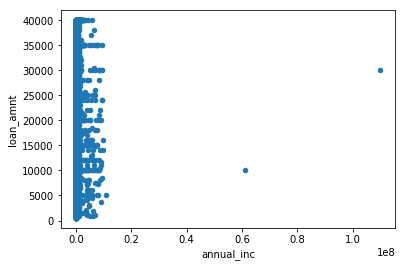

In [59]:
dfA.plot.scatter(x='annual_inc', y='loan_amnt')

We can see that there are just a few salaries that are not like the other.  

In [60]:
dfA.sort_values('annual_inc', ascending=False).head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util_pct,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,meets_credit_policy
1596240,30000.000,30000.000,30000.000,60.000,0.099,636.380,B,B2,Engineer,10.000,RENT,110000000.000,Verified,2017-08-01,Current,n,NaN,debt_consolidation,Debt consolidation,073xx,NJ,0.010,0.000,1994-04-01,0.000,nan,nan,5.000,0.000,20298.000,0.835,13.000,w,21138.090,21138.090,13455.010,13455.010,8861.910,4593.100,0.000,0.000,0.000,2019-05-01,636.380,2019-06-01,2019-05-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,0.000,20298.000,0.000,0.000,0.000,0.000,108.000,0.000,nan,1.000,1.000,11791.000,84.000,24300.000,0.000,0.000,1.000,1.000,4060.000,2143.000,89.900,0.000,0.000,108.000,279.000,9.000,9.000,0.000,103.000,nan,9.000,nan,0.000,3.000,5.000,3.000,7.000,1.000,5.000,12.000,5.000,5.000,0.000,0.000,0.000,1.000,100.000,100.000,0.000,0.000,24300.000,20298.000,21300.000,0.000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,N,NaT,NaN,NaT,nan,nan,nan,True
1340575,10000.000,10000.000,10000.000,36.000,0.114,329.480,B,B4,Waitress,10.000,MORTGAGE,61000000.000,Source Verified,2017-03-01,Current,n,NaN,debt_consolidation,Debt consolidation,234xx,VA,0.010,0.000,1996-04-01,1.000,44.000,nan,3.000,0.000,14413.000,0.351,6.000,w,3129.060,3129.060,8576.840,8576.840,6870.940,1705.900,0.000,0.000,0.000,2019-05-01,329.480,2019-06-01,2019-05-01,0.000,nan,1.000,Individual,nan,nan,NaN,0.000,0.000,14413.000,0.000,0.000,0.000,0.000,nan,0.000,nan,0.000,0.000,4571.000,35.000,41100.000,0.000,0.000,3.000,0.000,4804.000,24420.000,23.200,0.000,0.000,nan,251.000,140.000,140.000,0.000,192.000,44.000,3.000,44.000,0.000,2.000,3.000,2.000,4.000,0.000,3.000,6.000,3.000,3.000,0.000,0.000,0.000,0.000,66.700,0.000,0.000,0.000,41100.000,14413.000,31800.000,0

The engineer that is making 110,000,000 dollars a year and has taken out a 30,000 dollar loan for debt consolidation seems to be incorrect.  I would expect that it is off by 3 orders of magnitude.  The same can be said for the waitress that is making 61,000,000 dollars a year.  We could probably critique the salaries more, but those two are the major outliers.  

In [61]:
dfA.loc[1596240,'annual_inc']=110000

In [62]:
dfA.loc[1340575,'annual_inc']=61000

One more look at the scatterplot.  

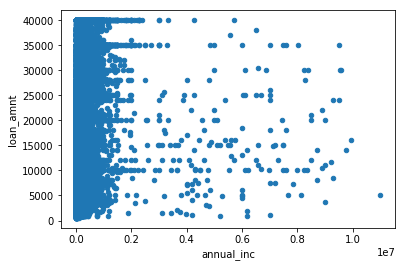

In [63]:
dfA.plot.scatter(x='annual_inc', y='loan_amnt')

In [64]:
dfA[dfA['annual_inc']>=1000000].shape

(676, 142)

We still have 676 borrowers that are listed as making over 1,000,000 dollars a year.  That is unlikely but not as far out of the realm of possibilities as the last two.  

Two borrowers have a negative debt to income ratio, which is not possible.  Since it is difficult to determine why they would use a negative dti, we will change those to null values.  

In [65]:
dfA.sort_values('dti', ascending=True).head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util_pct,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,meets_credit_policy
1348779,17000.000,17000.000,17000.000,60.000,0.135,391.080,C,C2,teacher,10.000,MORTGAGE,75000.000,Not Verified,2017-03-01,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,471xx,IN,-1.000,1.000,1992-09-01,0.000,23.000,nan,12.000,0.000,44587.000,0.782,34.000,w,0.000,0.000,20423.499,20423.500,17000.000,3423.500,0.000,0.000,0.000,2018-11-01,12948.380,NaT,2019-04-01,0.000,nan,1.000,Joint App,170000.000,22.270,Not Verified,0.000,0.000,299893.000,0.000,1.000,1.000,1.000,8.000,40332.000,nan,0.000,1.000,14618.000,78.000,57000.000,2.000,0.000,4.000,2.000,24991.000,3242.000,89.600,0.000,0.000,162.000,294.000,15.000,8.000,3.000,27.000,nan,2.000,35.000,0.000,5.000,10.000,5.000,8.000,9.000,10.000,22.000,10.000,12.000,0.000,0.000,0.000,1.000,91.200,40.000,0.000,0.000,333184.000,84919.000,31100.000,42668.000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,N,NaT,NaN,NaT,nan,nan,nan,True
918874,15000.000,15000.000,15000.000,36.000,0.098,482.250,B,B3,Maintenance electrician,5.000,MORTGAGE,94000.000,Source Verified,2016-03-01,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,970xx,OR,-1.000,0.000,2003-09-01,0.000,63.000,66.000,12.000,1.000,15445.000,0.458,24.000,w,0.000,0.000,16188.784,16188.780,15000.000,1188.780,0.000,0.000,0.000,2017-02-01,11382.530,NaT,2019-05-01,0.000,63.000,1.000,Individual,nan,nan,NaN,0.000,0.000,93070.000,1.000,3.000,1.000,4.000,10.000,77625.000,90.000,2.000,4.000,4108.000,73.000,33700.000,1.000,10.000,2.000,8.000,8461.000,3942.000,61.700,0.000,0.000,98.000,150.000,2.000,2.000,1.000,15.000,63.000,10.000,63.000,0.000,3.000,5.000,3.000,6.000,10.000,9.000,13.000,5.000,11.000,0.000,0.000,0.000,3.000

In [66]:
dfA.at[1348779, 'dti'] = None

In [67]:
dfA.at[918874, 'dti'] = None

The data seems fairly clean at this piont.  It is probably time to start exploring the data a bit more.  I am sure there will be more cleaning to come as we take a more detailed look at the data.  